In [36]:
import face_recognition
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2 #결국 안 씀
from PIL import Image


def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]

    return cropped_face

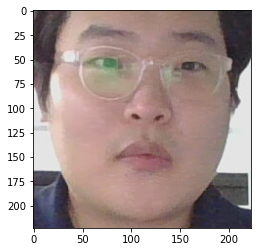

In [2]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/image.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

In [3]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['드웨인 존슨.jpg', '배성재.jpg', '숀 코네리.jpg', '크리스 에반스.jpg', '류승룡.jpeg', '기성용.jpg', '정민철.jpg', '윤종신.jpeg', '하승진.jpg', '박휘순.jpg', 'biden.jpg', '윤경신.jpg', '마동석.jpeg', '신동엽.jpg', 'image.jpg', '하정우.jpg', '강동원.jpg', '다니엘 크레이그.jpeg', '윤도현.png', '김경진.png', 'bush.jpeg', 'clinton.jpeg', '도지한.jpg', '박진영.jpg', '존 파브르.jpeg', '돈스파이크.jpg', '김영삼.jpeg', '김현수.jpeg', '박신양.png', '박항서.jpg', '황정민.jpg', '방시혁.jpeg', '손호준.jpeg', '목진화.png', '슈퍼비.jpeg', '권태원.jpeg', '유희열.jpeg', 'image3.jpg', '류현진.jpg', '케빈 스페이시.jpeg', '유지태.jpg', '김민재.jpeg', '제이콥 배털론.jpg', '무라니시.png', '이승기.jpeg', '유해진.jpg', '김종서.jpg', '이제훈.jpeg', '차승원.jpg', '이광수.jpg', '레오나르도 디카프리오.jpeg', '서강준.jpg', '정형돈.jpg', '사무엘 L 잭슨.jpg', '김구라.jpg', '이준혁.jpeg', '박보검.jpg', '앤드류 응.png', '김학범.jpg', '크리스 햄스워스.jpg', '이연걸.jpeg', '길.jpg', '박완규.png', '이승철.jpeg', '정국.jpg', '피어스 브로스넌.jpg', '박찬욱.jpeg', '박재범.jpg', '딕헌터.jpeg', '이종석.jpeg', '제이크 질렌할.jpeg', '정준하.jpg', '성시경.jpg', '최현석.jpg', '한석규.jpg', '성룡.jpg', '박명수.jpg', '잭 블랙.jpeg', '이정재.jpeg', '차두리.jpeg', '켄 정.jpeg', '김

In [4]:
image_file = os.path.join(dir_path, 'image.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

[array([-0.09675495,  0.10534862,  0.05650535, -0.03846302, -0.05939085,
        -0.12751442, -0.05239692, -0.155102  ,  0.10750881, -0.09767034,
         0.20101686, -0.08694961, -0.188934  , -0.12589261, -0.06238185,
         0.19556864, -0.14125609, -0.0917485 , -0.0843133 , -0.02714888,
         0.09152035,  0.00831076,  0.01276961,  0.03791959, -0.00444875,
        -0.32087365, -0.11143   , -0.07301804,  0.00936877,  0.00721077,
        -0.08390797,  0.0316529 , -0.1495322 , -0.13387804,  0.03400658,
         0.10969111, -0.05663686, -0.09444549,  0.17777321, -0.0529108 ,
        -0.18077135,  0.0074502 ,  0.12915701,  0.21802545,  0.1772618 ,
         0.05651236,  0.07768301, -0.14862917,  0.12333807, -0.14161558,
         0.05449059,  0.10397598,  0.10011005,  0.07308681,  0.05614439,
        -0.12938088,  0.04492375,  0.12684226, -0.1369943 ,  0.02301668,
         0.1235076 , -0.06070895, -0.11348324, -0.06094302,  0.25921264,
         0.1180049 , -0.11681644, -0.17438217,  0.1

In [5]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

In [6]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['image']

array([-0.09675495,  0.10534862,  0.05650535, -0.03846302, -0.05939085,
       -0.12751442, -0.05239692, -0.155102  ,  0.10750881, -0.09767034,
        0.20101686, -0.08694961, -0.188934  , -0.12589261, -0.06238185,
        0.19556864, -0.14125609, -0.0917485 , -0.0843133 , -0.02714888,
        0.09152035,  0.00831076,  0.01276961,  0.03791959, -0.00444875,
       -0.32087365, -0.11143   , -0.07301804,  0.00936877,  0.00721077,
       -0.08390797,  0.0316529 , -0.1495322 , -0.13387804,  0.03400658,
        0.10969111, -0.05663686, -0.09444549,  0.17777321, -0.0529108 ,
       -0.18077135,  0.0074502 ,  0.12915701,  0.21802545,  0.1772618 ,
        0.05651236,  0.07768301, -0.14862917,  0.12333807, -0.14161558,
        0.05449059,  0.10397598,  0.10011005,  0.07308681,  0.05614439,
       -0.12938088,  0.04492375,  0.12684226, -0.1369943 ,  0.02301668,
        0.1235076 , -0.06070895, -0.11348324, -0.06094302,  0.25921264,
        0.1180049 , -0.11681644, -0.17438217,  0.17053682, -0.15

In [7]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('image', 'image3')

0.39565683334869306

In [8]:

# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('image')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [9]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('image',
  array([-0.09675495,  0.10534862,  0.05650535, -0.03846302, -0.05939085,
         -0.12751442, -0.05239692, -0.155102  ,  0.10750881, -0.09767034,
          0.20101686, -0.08694961, -0.188934  , -0.12589261, -0.06238185,
          0.19556864, -0.14125609, -0.0917485 , -0.0843133 , -0.02714888,
          0.09152035,  0.00831076,  0.01276961,  0.03791959, -0.00444875,
         -0.32087365, -0.11143   , -0.07301804,  0.00936877,  0.00721077,
         -0.08390797,  0.0316529 , -0.1495322 , -0.13387804,  0.03400658,
          0.10969111, -0.05663686, -0.09444549,  0.17777321, -0.0529108 ,
         -0.18077135,  0.0074502 ,  0.12915701,  0.21802545,  0.1772618 ,
          0.05651236,  0.07768301, -0.14862917,  0.12333807, -0.14161558,
          0.05449059,  0.10397598,  0.10011005,  0.07308681,  0.05614439,
         -0.12938088,  0.04492375,  0.12684226, -0.1369943 ,  0.02301668,
          0.1235076 , -0.06070895, -0.11348324, -0.06094302,  0.25921264,
          0.1180049 , -0.11

In [10]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('image',
  array([-0.09675495,  0.10534862,  0.05650535, -0.03846302, -0.05939085,
         -0.12751442, -0.05239692, -0.155102  ,  0.10750881, -0.09767034,
          0.20101686, -0.08694961, -0.188934  , -0.12589261, -0.06238185,
          0.19556864, -0.14125609, -0.0917485 , -0.0843133 , -0.02714888,
          0.09152035,  0.00831076,  0.01276961,  0.03791959, -0.00444875,
         -0.32087365, -0.11143   , -0.07301804,  0.00936877,  0.00721077,
         -0.08390797,  0.0316529 , -0.1495322 , -0.13387804,  0.03400658,
          0.10969111, -0.05663686, -0.09444549,  0.17777321, -0.0529108 ,
         -0.18077135,  0.0074502 ,  0.12915701,  0.21802545,  0.1772618 ,
          0.05651236,  0.07768301, -0.14862917,  0.12333807, -0.14161558,
          0.05449059,  0.10397598,  0.10011005,  0.07308681,  0.05614439,
         -0.12938088,  0.04492375,  0.12684226, -0.1369943 ,  0.02301668,
          0.1235076 , -0.06070895, -0.11348324, -0.06094302,  0.25921264,
          0.1180049 , -0.11

In [11]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [12]:
get_nearest_face('image')
#image3은 다른 모습의 내 사진

순위 1 : 이름(image3), 거리(0.39565683334869306)
순위 2 : 이름(박휘순), 거리(0.407291482034899)
순위 3 : 이름(이영하), 거리(0.41414411476811164)
순위 4 : 이름(최무성), 거리(0.4235443061519362)
순위 5 : 이름(개코), 거리(0.43175157619211574)


In [89]:
def pic(img):
    pic = img
    pic_i = Image.open(pic)
    plt.imshow(pic_i)

Text(0.5, 1.0, '5th')

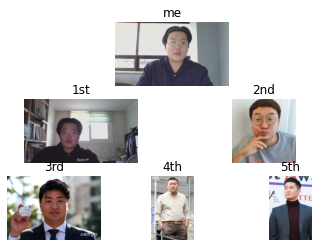

In [190]:
plt.subplot(311)
pic(os.getenv('HOME')+'/aiffel/face_embedding/images/image.jpg')
plt.axis("off")
plt.title("me")
plt.subplot(323)
pic(os.getenv('HOME')+'/aiffel/face_embedding/images/image3.jpg')
plt.axis("off")
plt.title("1st")
plt.subplot(324)
pic(os.getenv('HOME')+'/aiffel/face_embedding/images/박휘순.jpg')
plt.axis("off")
plt.title("2nd")
plt.subplot(337)
pic(os.getenv('HOME')+'/aiffel/face_embedding/images/이영하.jpg')
plt.axis("off")
plt.title("3rd")
plt.subplot(338)
pic(os.getenv('HOME')+'/aiffel/face_embedding/images/최무성.jpg')
plt.axis("off")
plt.title("4th")
plt.subplot(339)
pic(os.getenv('HOME')+'/aiffel/face_embedding/images/개코.jpeg')
plt.axis("off")
plt.title("5th")

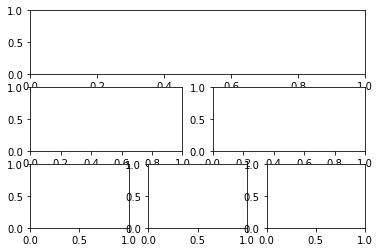

In [192]:
#subplot 연습
plt.subplot(311)
plt.subplot(323)
plt.subplot(324)
plt.subplot(337)
plt.subplot(338)
plt.subplot(339)

처음에는 거리로 표현할까 하다가, 시상식처럼 해보고 싶다는 생각에 subplot을 다시 공부했다. 1시간 동안 검색해보고 이것저것 시도하다가 얻어걸린거라 완전히 이해하지는 못했다. 지금 다시 보면서 이해가 갔다. 311은 열이 3개 행이 1개짜리, 323은 위에 행이 2개가 있다고 인지한 상태에서 첫번째니까 3, 337은 위에 행이 6개 있다고 인지한 상태에서 첫번째니까 7인 것 같다.
저번 노드부터 썼지만 되도록 함수 만들기를 이용하려고 한다. 복습하기도 좋고 거의 복붙이지만 함수 만들기를 하고 있으면 내가 코드를 만들고 있다는 느낌이 든다.